In [1]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

/Users/shenstella/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load the data

In [2]:
data = pd.read_csv('data.csv', parse_dates=['Intake-DateTime', 'Outcome-DateTime'])
data.dtypes

AnimalID                         object
ID                               object
Breed                            object
Color                            object
Gender                           object
Name                             object
Intake-DateTime          datetime64[ns]
Intake-Type                      object
Intake-Condition                 object
Intake-Age(days)                  int64
Date-Of-Birth                    object
Outcome-DateTime         datetime64[ns]
Outcome-Type                     object
Outcome-Subtype                  object
Outcome-Age(days)                 int64
Age                              object
IsAdopted                          bool
Category                         object
Intelligence-Ranking              int64
Intelligence-Category            object
Size-Category                    object
Longevity                       float64
Total-Cost($)                     int64
Purchase-Cost($)                  int64
Food-Cost($)                      int64


In [3]:
data['ReFoundByShelter'] = data['ID'].str.contains('\+')
data

,AnimalID,ID,Breed,Color,Gender,Name,Intake-DateTime,Intake-Type,Intake-Condition,Intake-Age(days),...,Category,Intelligence-Ranking,Intelligence-Category,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($),Cost-Category,ReFoundByShelter
0,A006100,A006100,Spinone Italiano,Yellow,Male,Scamp,2014-03-07 14:26:00,Public Assist,Normal,2190,...,Sporting,27,Above-Average,Large,9.00,18062,1725,5679,Budget,False
1,A006100,A006100+,Spinone Italiano,Yellow,Male,Scamp,2014-12-19 10:21:00,Public Assist,Normal,2555,...,Sporting,27,Above-Average,Large,9.00,18062,1725,5679,Budget,True
2,A006100,A006100++,Spinone Italiano,Yellow,Male,Scamp,2017-12-07 14:07:00,Stray,Normal,3650,...,Sporting,27,Above-Average,Large,9.00,18062,1725,5679,Budget,True
3,A134067,A134067,Shetland Sheepdog,Brown,Male,Bandit,2013-11-16 09:02:00,Public Assist,Injured,12190,...,Herding,6,Brightest,Small,12.53,17469,465,3698,Saver,False
4,A141142,A141142,Labrador Retriever,Black,Female,Bettie,2013-11-16 14:46:00,Stray,Aged,11825,...,Sporting,7,Brightest,Medium,12.04,18422,810,4819,Budget,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85791,A893431,A893431,Chihuahua,Tricolor,Female,Chili,2023-11-21 11:21:00,Public Assist,Normal,2920,...,Toy,67,Fair,Small,16.50,22640,588,4594,High-End,False
85792,A893432,A893432,Chihuahua,Tan,Female,Coco,2023-11-21 11:21:00,Public Assist,Normal,2920,...,Toy,67,Fair,Small,16.50,22640,588,4594,High-End,False
85793,A893452,A893452,Maltese,White,Female,Sophie,2023-11-21 13:38:00,Public Assist,Normal,2555,...,Toy,59,Fair,Small,12.25,16073,650,2410,Saver,False
85794,A893529,A893529,Labrador Retriever,White,Female,Unknown,2023-11-22 14:26:00,Owner Surrender,Normal,30,...,Sporting,7,Brightest,Medium,12.04,18422,810,4819,Budget,False


In [4]:
y = data.iloc[:,26:27]

### Prepare the data, replace object data with numerical values

In [5]:
X = data.iloc[:,:].drop(columns=["IsAdopted", "ReFoundByShelter", "AnimalID", "ID", "Intake-DateTime","Color", "Breed","Outcome-DateTime", "Intelligence-Category", "Date-Of-Birth","Name", "Intake-Condition", "Category","Outcome-Subtype", "Intake-Age(days)", "Cost-Category", "Outcome-Type", "Intake-Type", "Outcome-Age(days)"])
X

,Gender,Age,Intelligence-Ranking,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($)
0,Male,Adult,27,Large,9.00,18062,1725,5679
1,Male,Senior,27,Large,9.00,18062,1725,5679
2,Male,Senior,27,Large,9.00,18062,1725,5679
3,Male,Senior,6,Small,12.53,17469,465,3698
4,Female,Senior,7,Medium,12.04,18422,810,4819
...,...,...,...,...,...,...,...,...
85791,Female,Senior,67,Small,16.50,22640,588,4594
85792,Female,Senior,67,Small,16.50,22640,588,4594
85793,Female,Senior,59,Small,12.25,16073,650,2410
85794,Female,Baby,7,Medium,12.04,18422,810,4819


In [6]:
# Here we replace all the descriptive lable into numerical lable
gender = X.groupby('Gender').size()
X['Gender'].replace(['Female','Male'], [0,1], inplace=True)
SizeCategory = X.groupby('Size-Category').size()
X['Size-Category'].replace(['Large','Medium','Small'], [3,2,1], inplace=True)
Age = X.groupby('Age').size()
X['Age'].replace(['Baby','Young','Adult', 'Senior'], [1,2,3,4], inplace=True)
X


,Gender,Age,Intelligence-Ranking,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($)
0,1,3,27,3,9.00,18062,1725,5679
1,1,4,27,3,9.00,18062,1725,5679
2,1,4,27,3,9.00,18062,1725,5679
3,1,4,6,1,12.53,17469,465,3698
4,0,4,7,2,12.04,18422,810,4819
...,...,...,...,...,...,...,...,...
85791,0,4,67,1,16.50,22640,588,4594
85792,0,4,67,1,16.50,22640,588,4594
85793,0,4,59,1,12.25,16073,650,2410
85794,0,1,7,2,12.04,18422,810,4819


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# kNN is sensitive to the scale of features, so it's a good idea to normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Choose the number of neighbors (you can experiment with different values)
n_neighbors = 3

# Create kNN classifier
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Train the model
knn.fit(X_train_scaled, y_train.values.ravel())

# Make predictions
y_pred = knn.predict(X_test_scaled)


In [10]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8052447552447553
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.94      0.89     14543
        True       0.17      0.07      0.10      2617

    accuracy                           0.81     17160
   macro avg       0.51      0.50      0.50     17160
weighted avg       0.74      0.81      0.77     17160



### Using Cross Validation to Get the Best Value of k

In [11]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

# Convert y_train to a NumPy array and then use ravel()
y_train_np = y_train.values.ravel()

X = scaler.fit_transform(X)

# Create kNN classifier
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Train the model
knn.fit(X_train_scaled, y_train_np)
# Use cross_val_score
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train_np, cv=5)
    scores.append(np.mean(score))
    

### We can plot the results with the following code

Text(0, 0.5, 'Accuracy Score')

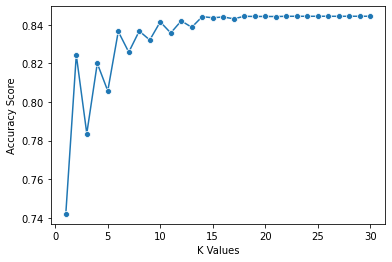

In [12]:
import seaborn as sns
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


### Since we know know what could be the best K value, we update the model with the best K

In [14]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train_np)


KNeighborsClassifier(n_neighbors=26)

In [15]:
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8476689976689976
Classification Report:
               precision    recall  f1-score   support

       False       0.85      1.00      0.92     14543
        True       1.00      0.00      0.00      2617

    accuracy                           0.85     17160
   macro avg       0.92      0.50      0.46     17160
weighted avg       0.87      0.85      0.78     17160



### evaluate with accuracy, precision, and recall

In [16]:
from sklearn.metrics import precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8476689976689976
Precision: 1.0
Recall: 0.0011463507833397019


In [17]:
y_pred = knn.predict(X_test_scaled)


### Use each feature alone - to fit a KNN model on the training set.

/Users/shenstella/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation for the feature:  Gender
Accuracy: 0.8474941724941725
Precision: 0.0
Recall: 0.0
Evaluation for the feature:  Age
Accuracy: 0.4244172494172494
Precision: 0.18489583333333334
Recall: 0.8139090561711884
Evaluation for the feature:  Intelligence-Ranking
Accuracy: 0.8251165501165502
Precision: 0.17235494880546076
Recall: 0.03859380970576996


/Users/shenstella/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation for the feature:  Size-Category
Accuracy: 0.8474941724941725
Precision: 0.0
Recall: 0.0
Evaluation for the feature:  Longevity
Accuracy: 0.8374125874125874
Precision: 0.1685823754789272
Recall: 0.016813144822315627
Evaluation for the feature:  Total-Cost($)
Accuracy: 0.8136363636363636
Precision: 0.18526543878656554
Recall: 0.06534199465036301
Evaluation for the feature:  Purchase-Cost($)
Accuracy: 0.8057692307692308
Precision: 0.17395264116575593
Recall: 0.07298433320596102
Evaluation for the feature:  Food-Cost($)
Accuracy: 0.7314685314685314
Precision: 0.12448132780082988
Recall: 0.12609858616736722


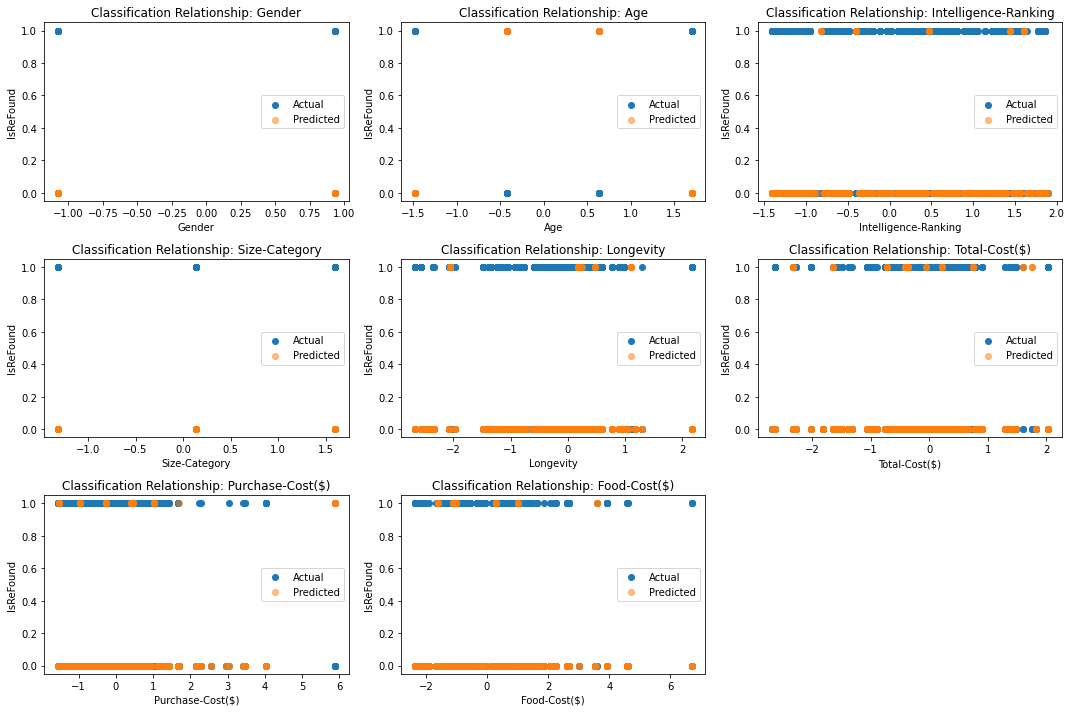

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Feature names
names = ["Gender", "Age", "Intelligence-Ranking", "Size-Category", "Longevity", "Total-Cost($)", "Purchase-Cost($)", "Food-Cost($)"]

plt.figure(figsize=(15, 10))

# Iterate over each feature
for i in range(len(names)):
    plt.subplot(3, 3, i + 1)
    
    # Extract the current feature
    x = X[:, i].reshape(-1, 1)
    
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Convert y_train to a NumPy array and then use ravel()
    y_train_np = y_train.values.ravel()
    
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    
    # Train the model
    knn.fit(x_train, y_train_np)
    
    y_pred = knn.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print("Evaluation for the feature: ", names[i])
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    
    # Visualize decision boundary
    plt.scatter(x_test, y_test, label='Actual')
    plt.scatter(x_test, knn.predict(x_test), label='Predicted', marker='o', alpha=0.5)
    
    plt.title(f"Classification Relationship: {names[i]}")
    plt.xlabel(names[i])
    plt.ylabel('IsReFound')
    plt.legend()

plt.tight_layout()
plt.show()


### Visualization

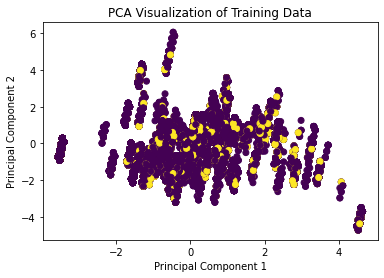

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the data to 2 dimensions (you can adjust this based on the number of features)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the data points in 2D space with color-coded classes
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_np, cmap='viridis')
plt.title('PCA Visualization of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Conclusion & Discussion

From the Nearest Neighbor (kNN) Classifier model, we can see:
1. Age, Purchase cost, Food cost, Total-Cost do not affect if the pet will be refound by shelter.
2. Size, Gender, Longevity and Intelligence level have a high influence on whether this dog will be refound by shelter. 
3. The model performs much better with all features rather than any individual ones. This quite makes sense since the model is better trained for classification.
4. The PCA plot suggests that to be refound by shelter is a complex decision that can't be easily predicted by one or two features alone.